In [71]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Wikipedia page URL
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'

# Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables with class "wikitable"
tables = soup.find_all('table', {'class': 'wikitable'})

# Ensure tables are found
if not tables:
    raise ValueError("No tables found on the page. The structure may have changed.")

# Select the first GDP table
table = tables[0]

# Manually defining headers (since the extracted header row is incorrect)
headers = ["Country/Territory", "IMF Estimate", "IMF Year",
           "World Bank Estimate", "World Bank Year",
           "United Nations Estimate", "United Nations Year"]

# Extract rows dynamically
data = []
for tr in table.find_all('tr')[1:]:  # Skip the header row
    row = [td.get_text(strip=True) for td in tr.find_all(['td', 'th'])]  # Extract both td and th
    if len(row) == 7:  # Ensure only rows with 7 columns are taken
        data.append(row)

# Convert to DataFrame
df = pd.DataFrame(data, columns=headers)


# Save to CSV (optional)
df.to_csv("gdp_data.csv", index=False)


In [72]:
df.head()

,Country/Territory,IMF Estimate,IMF Year,World Bank Estimate,World Bank Year,United Nations Estimate,United Nations Year
0,World,"115,494,312",2025,"105,435,540",2023,"100,834,796",2022
1,United States,"30,338,000",2025,"27,360,935",2023,"25,744,100",2022
2,China,"19,535,000",[n 1]2025,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
3,Germany,"4,922,000",2025,"4,456,081",2023,"4,076,923",2022
4,Japan,"4,390,000",2025,"4,212,945",2023,"4,232,173",2022


In [73]:
import re  # Import regex module

# Function to clean footnotes like [n 1], [n 3]
def clean_text(text):
    return re.sub(r'\[.*?\]', '', text)  # Removes anything inside square brackets

# Apply cleaning function to all DataFrame columns
df = df.applymap(clean_text)


# Save cleaned data to CSV
df.to_csv("gdp_data_cleaned.csv", index=False)

<ipython-input-73-c1edc2c14b3d>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_text)


In [74]:
df.head()

,Country/Territory,IMF Estimate,IMF Year,World Bank Estimate,World Bank Year,United Nations Estimate,United Nations Year
0,World,"115,494,312",2025,"105,435,540",2023,"100,834,796",2022
1,United States,"30,338,000",2025,"27,360,935",2023,"25,744,100",2022
2,China,"19,535,000",2025,"17,794,782",2023,"17,963,170",2022
3,Germany,"4,922,000",2025,"4,456,081",2023,"4,076,923",2022
4,Japan,"4,390,000",2025,"4,212,945",2023,"4,232,173",2022


In [75]:
# Remove the row where 'Country/Territory' is 'World'
df = df[df['Country/Territory'] != 'World']
# Delete year columns
df = df.drop(columns=['IMF Year', 'World Bank Year', 'United Nations Year'])

In [78]:
# Remove commas and convert to numeric
df[['IMF Estimate', 'World Bank Estimate', 'United Nations Estimate']] = df[
    ['IMF Estimate', 'World Bank Estimate', 'United Nations Estimate']
].replace(',', '', regex=True).astype(float)

# Now, check the summary statistics
print(df.describe())


       IMF Estimate  World Bank Estimate  United Nations Estimate
count  1.900000e+02         1.900000e+02             1.900000e+02
mean   6.032435e+05         5.474504e+05             5.246689e+05
std    2.693698e+06         2.436659e+06             2.341743e+06
min    6.600000e+01         6.200000e+01             5.900000e+01
25%    1.317525e+04         1.330725e+04             1.257175e+04
50%    4.666650e+04         4.473850e+04             4.070650e+04
75%    3.111215e+05         2.822108e+05             2.618488e+05
max    3.033800e+07         2.736094e+07             2.574410e+07


In [79]:
# Convert GDP estimates from millions to billions
df['IMF Estimate'] = df['IMF Estimate'].astype(float) / 1000
df['World Bank Estimate'] = df['World Bank Estimate'].astype(float) / 1000
df['United Nations Estimate'] = df['United Nations Estimate'].astype(float) / 1000

# Optionally, rename the columns to reflect the change in units
df = df.rename(columns={
    'IMF Estimate': 'IMF Estimate (Billions USD)',
    'World Bank Estimate': 'World Bank Estimate (Billions USD)',
    'United Nations Estimate': 'United Nations Estimate (Billions USD)'
})

In [81]:
# Now, check the summary statistics
print(df.describe())

       IMF Estimate (Billions USD)  World Bank Estimate (Billions USD)  \
count                   190.000000                          190.000000   
mean                    603.243516                          547.450363   
std                    2693.697962                         2436.658685   
min                       0.066000                            0.062000   
25%                      13.175250                           13.307250   
50%                      46.666500                           44.738500   
75%                     311.121500                          282.210750   
max                   30338.000000                        27360.935000   

       United Nations Estimate (Billions USD)  
count                              190.000000  
mean                               524.668874  
std                               2341.743428  
min                                  0.059000  
25%                                 12.571750  
50%                                 40.706500

In [84]:
top_countries_imf = df.sort_values(by='IMF Estimate (Billions USD)', ascending=False).head(10)
print(top_countries_imf)

   Country/Territory  IMF Estimate (Billions USD)  \
1      United States                      30338.0   
2              China                      19535.0   
3            Germany                       4922.0   
4              Japan                       4390.0   
5              India                       4270.0   
6     United Kingdom                       3731.0   
7             France                       3284.0   
8              Italy                       2460.0   
9             Canada                       2331.0   
10            Brazil                       2308.0   

    World Bank Estimate (Billions USD)  United Nations Estimate (Billions USD)  
1                            27360.935                               25744.100  
2                            17794.782                               17963.170  
3                             4456.081                                4076.923  
4                             4212.945                                4232.173  
5          

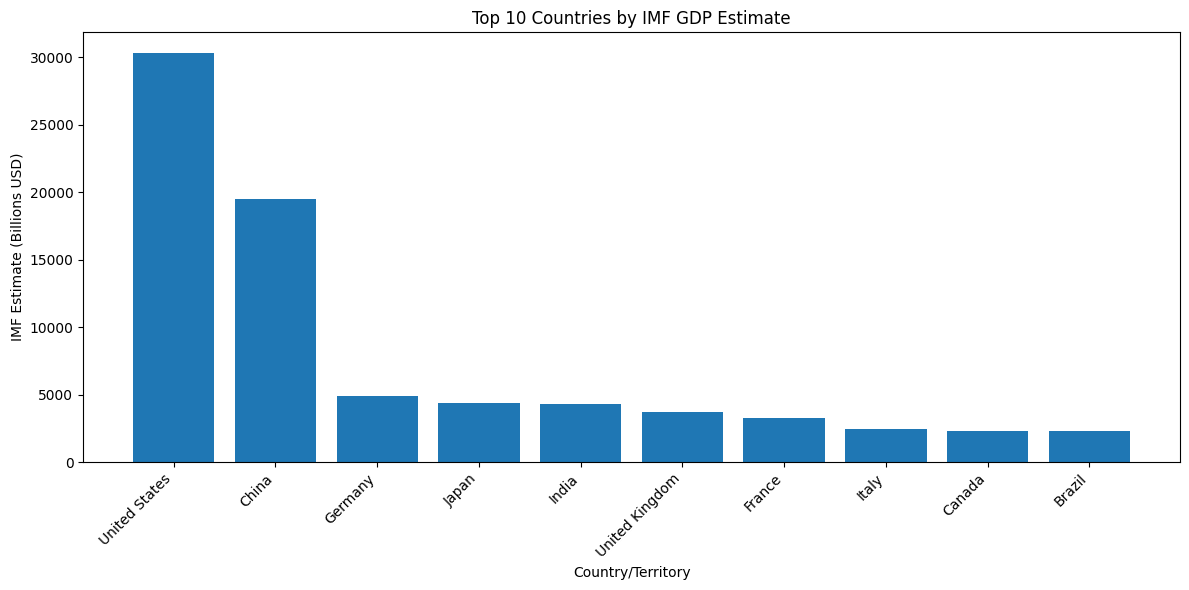

In [89]:
import matplotlib.pyplot as plt

top_countries = df.sort_values(by='IMF Estimate (Billions USD)', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_countries['Country/Territory'], top_countries['IMF Estimate (Billions USD)'])  # Corrected column name
plt.xlabel('Country/Territory')
plt.ylabel('IMF Estimate (Billions USD)')
plt.title('Top 10 Countries by IMF GDP Estimate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()